# Perceptron for regression

This notebook presents how to build neural network perceptron for classification problem. 
We will classify 2 sets of points on surface which can be separated by a line (linearly separable).

This work is based on examples from course https://www.coursera.org/learn/machine-learning-calculus prepared by author Luis Serrano.


In [2]:
import numpy as np
np.random.seed(345)

<a name='2'></a>
## Maths behind the single Perceptron Neural Network with Activation Function

Linear separation refers to data points in binary classification problems that can be separated by a linear decision boundary. If the data points can be separated by a line, linear function, or flat hyperplane, they are said to be linearly separable.

If separate points in an n-dimensional space exist, then it is said to be linearly separable 

$$w_1x_1 + w_2x_2 + w_nx_n + b = 0$$

For two-dimensional input data, if there is a line, whose equation is $$w_1x_1 + w_2x_2 + b = 0$$

that separates all samples of one class from the other class, then the corresponding observation can be derived from the equation of the separating line. Such classification problems are called "linearly separable", i.e. separating by linear combination.

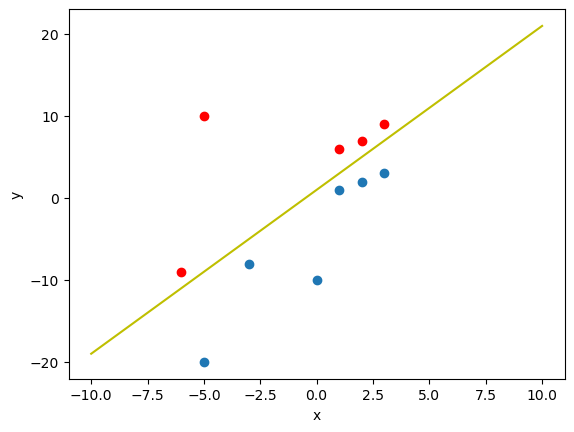

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-10, 10, 50)
plt.xlabel('x')
plt.ylabel('y')
ax = plt.subplot(1, 1, 1)
ax.scatter([1, 2, 3, -5, 0, -3], [1, 2, 3, -20, -10, -8])
ax.scatter([1, 2, 3, -5, -6], [6, 7, 9, 10, -9], color='r', marker='o')
plt.plot(x, 2*x+1, 'y')
plt.show()



The input layer contains two nodes $x_1$ and $x_2$. Weight vector $W = \begin{bmatrix} w_1 & w_2\end{bmatrix}$ and bias ($b$) are the parameters to be updated during the model training.

$$z^{(i)} = w_1x_1^{(i)} + w_2x_2^{(i)} + b = Wx^{(i)} + b.\tag{1}$$


To be able to perform classification we need nonlinear approach. This can achieved with sigmoid activation function which roughly replace values with nearly 0 or nearly 1 for most cases and some values between for small range near 0. 

$$\hat{y} = \begin{cases} 1 & \mbox{if } a > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{10}$$
 
Sigmoid activation function is defined as

$$a = \sigma\left(z\right) = \frac{1}{1+e^{-z}}.\tag{2}$$



sigmoid(0) = 0.52497918747894
sigmoid(0) = 0.47502081252106
sigmoid(-2) = 4.5397868702434395e-05
sigmoid(3.5) = 0.9933071490757153


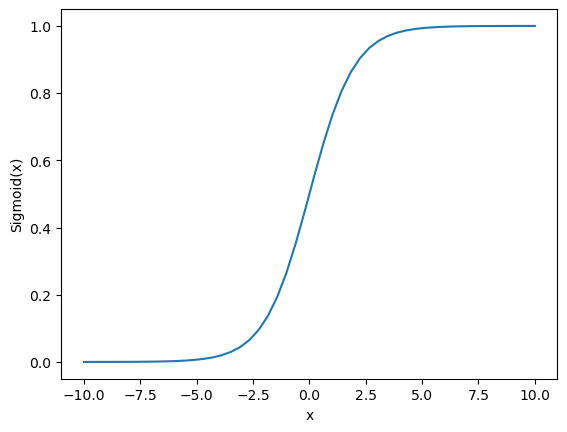

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

print("sigmoid(0) = " + str(sigmoid(0.1)))
print("sigmoid(0) = " + str(sigmoid(-0.1)))
print("sigmoid(-2) = " + str(sigmoid(-10)))
print("sigmoid(3.5) = " + str(sigmoid(5)))

x = np.linspace(-10, 10, 50)
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.plot(x, sigmoid(x))
plt.show()

Threshold value of $0.5$ can be used for predictions: $1$ (red) if  $a > 0.5$ and $0$ (blue) otherwise. 

The single perceptron neural network with sigmoid activation function can be expressed as:

\begin{align}
z^{(i)} &=  W x^{(i)} + b,\\
a^{(i)} &= \sigma\left(z^{(i)}\right).\\\tag{3}
\end{align}

With $m$ training examples organised in the columns of ($2 \times m$) matrix $X$, you can apply the activation function element-wise. So the model can be written as:

\begin{align}
Z &=  W X + b,\\
A &= \sigma\left(Z\right),\\\tag{4}
\end{align}

When dealing with classification problems, the most commonly used cost function is the **log loss**, which is described by the following equation:

$$\mathcal{L}\left(W, b\right) = \frac{1}{m}\sum_{i=1}^{m} L\left(W, b\right) = \frac{1}{m}\sum_{i=1}^{m}  \large\left(\small -y^{(i)}\log\left(a^{(i)}\right) - (1-y^{(i)})\log\left(1- a^{(i)}\right)  \large  \right) \small,\tag{5}$$

where $y^{(i)} \in \{0,1\}$ are the original labels and $a^{(i)}$ are the continuous output values of the forward propagation step (elements of array $A$).

We want to minimize the cost function during the training. To implement gradient descent, calculate partial derivatives using chain rule:



\begin{align}
\frac{\partial \mathcal{L} }{ \partial w_1 } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(a^{(i)} - y^{(i)}\right)x_1^{(i)},\\
\frac{\partial \mathcal{L} }{ \partial w_2 } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(a^{(i)} - y^{(i)}\right)x_2^{(i)},\tag{7}\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(a^{(i)} - y^{(i)}\right).
\end{align}

Equations above can be rewritten in a matrix form:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W } &= 
\begin{bmatrix} \frac{\partial \mathcal{L} }{ \partial w_1 } & 
\frac{\partial \mathcal{L} }{ \partial w_2 }\end{bmatrix} = \frac{1}{m}\left(A - Y\right)X^T,\\
\frac{\partial \mathcal{L} }{ \partial b } &= \frac{1}{m}\left(A - Y\right)\mathbf{1}.
\tag{8}
\end{align}

where $\left(A - Y\right)$ is an array of a shape ($1 \times m$), $X^T$ is an array of a shape ($m \times 2$) and $\mathbf{1}$ is just a ($m \times 1$) vector of ones.



Then you can update the parameters:

\begin{align}
W &= W - \alpha \frac{\partial \mathcal{L} }{ \partial W },\\
b &= b - \alpha \frac{\partial \mathcal{L} }{ \partial b },
\tag{9}\end{align}

where $\alpha$ is the learning rate. Repeat the process in a loop until the cost function stops decreasing.

in last step apply activation
$$\hat{y} = \begin{cases} 1 & \mbox{if } a > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{10}$$


### Dataset

As a dataset we will generate $m=50$ data points $(x_1, x_2)$, where $x_1, x_2 \in \{0,1\}$ and save them in the `NumPy` array `X` of a shape $(2 \times m)$. The labels ($0$: blue, $1$: red) will be calculated so that $y = 1$ if $x_1 = 1$ and $x_2 = 0$, in the rest of the cases $y=0$. The labels will be saved in the array `Y` of a shape $(1 \times m)$.

X: [[ 1.19978652  0.95031661  0.80873129  0.13952913  0.96175082  0.15274232
   0.92271172 -0.04405584  0.91654268  0.16266283  0.19330664  1.17076592
   0.07270176  0.99687986  0.81753505 -0.01677217  0.83041749 -0.10616153
   0.89507676 -0.10664509 -0.08547388  0.80609403  0.93595238  1.064123
   1.16899651  0.04269977 -0.0490145   0.84145404 -0.04740502  1.19846407
   0.91594491 -0.16903458  0.08156376  0.13431113  0.09976256  0.00167248
  -0.05955804  0.85271871  0.01428818  1.1755512   0.12476304  1.00033195
   0.81685723  0.83183929  0.12245658 -0.01441964  0.80324035  1.01862262
   1.05195123  0.97084759]
 [-0.17267962  1.0698047  -0.01274639  0.11233212  0.99803499  0.04026802
   0.80062472  0.07487963  1.06890271  0.80796417 -0.06473424 -0.08912744
  -0.17268836  0.93356248 -0.03783487  0.08030053  1.05326673  0.88994474
   0.89408231 -0.18396964  0.14820902  0.02190979  0.8667869   0.84217833
   0.16798535  1.03755787  1.09048399  0.17311855  0.88678648  0.18046145
   0.15679

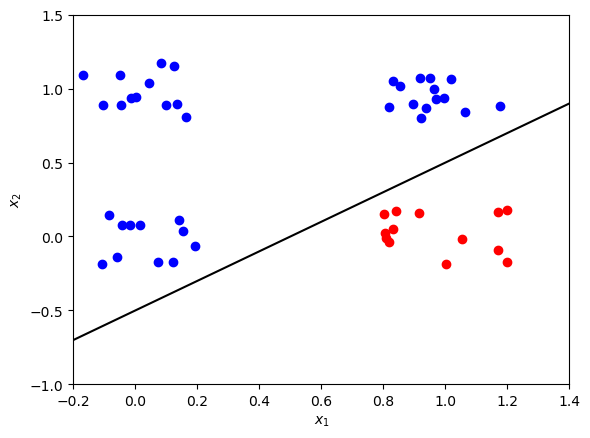

In [63]:
m = 50

X = np.random.randint(0, 2, (2, m))
Y = np.logical_and(X[0] == 1, X[1] == 0).astype(int).reshape((1, m))

# randomize points - add random values from range (-0.2, 0.2)
# this will keep points in similar but not exact positions 
vfunc = np.vectorize(lambda x: x + np.random.uniform(-0.2, 0.2))
X = vfunc(X)

print("X:", X)
print("Y:", Y)

print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(Y.shape))

fig, ax = plt.subplots()
x_line = np.arange(-1, 2, 0.1)
# Data points (observations) from two classes.
for idx,x in enumerate(X[0]):
    if Y[0][idx] == 1:
        color = 'r'
    else: 
        color = 'b'
    ax.scatter(x, X[1][idx], color=color)
    
ax.set_xlim([xmin, xmax])
ax.set_ylim([-1, 1.5])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
# example line which can be used as a decision boundary to separate two classes.
ax.plot(x_line, x_line - 0.5, color="black")
plt.plot()
plt.show()


## Neural Network Model


### Neural Network Structure

In [55]:
#get size of training set and target
n_x = X.shape[0]
n_y = Y.shape[0]
print(n_x, n_y)

2 1


### Initialize the Model's Parameters

Initialize weights(W) array of shape $(n_y \times n_x) = (1 \times 1)$ with random values and the bias(b) vector of shape $(n_y \times 1) = (1 \times 1)$ with zeros.

In [74]:
def init_params(n_x, n_y):
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))
    
    return W, b

W, b = init_params(n_x, n_y)
print("W = " + str(W))
print("b = " + str(b))

W = [[-0.00998757 -0.02344641]]
b = [[0.]]



### Forward propagation


\begin{align}
Z &=  W X + b,\\
A &= \sigma\left(Z\right).
\end{align}

In [60]:
def forward_propagation(X, W, b):
    Z = np.matmul(W, X) + b
    A = sigmoid(Z)

    return A

result = forward_propagation(X, W, b)

print(result)

[[0.49840652 0.49842939 0.50267674 0.50245231 0.50268226 0.50169756
  0.5023702  0.50136995 0.50062147 0.49899382 0.502404   0.4984059
  0.50200793 0.49986411 0.50267392 0.50310566 0.49979948 0.49934312
  0.49941673 0.4986258  0.50233503 0.50102234 0.50300503 0.50265155
  0.50259225 0.49999992 0.5027135  0.49856579 0.49895381 0.49934969
  0.50000931 0.49911311 0.49855331 0.50023704 0.50233261 0.49928599
  0.50131529 0.50286864 0.50216653 0.50294464 0.49941316 0.50115547
  0.4998184  0.50155089 0.50082934 0.50126028 0.50109936 0.50204614
  0.4991037  0.50298921]]


### Logloss cost calculation

$$\mathcal{L}\left(W, b\right)  = \frac{1}{m}\sum_{i=1}^{m}  \large\left(\small -y^{(i)}\log\left(a^{(i)}\right) - (1-y^{(i)})\log\left(1- a^{(i)}\right)  \large  \right) \small.$$

In [67]:
def compute_cost(A, Y):
    m = Y.shape[1]

    # compute cost
    logprobs = - np.multiply(np.log(A),Y) - np.multiply(np.log(1 - A),1 - Y)
    cost = 1/m * np.sum(logprobs)
    
    return cost

print(str(compute_cost(result, Y)))

0.6944098877981653


Calculate partial derivatives

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W } &= \frac{1}{m}\left(A - Y\right)X^T,\\
\frac{\partial \mathcal{L} }{ \partial b } &= \frac{1}{m}\left(A - Y\right)\mathbf{1}.
\end{align}

In [69]:
def backward_propagation(A, X, Y):
    m = X.shape[1]
    
    # calculate partial derivatives denoted as dW, db 
    dZ = A - Y
    dW = 1/m * np.dot(dZ, X.T)
    db = 1/m * np.sum(dZ, axis = 1, keepdims = True)
    
    return dW, db

dW, db = backward_propagation(result, X, Y)

print("dW = " + str(dW))
print("db = " + str(db))

dW = [[0.01387878 0.24556507]]
db = [[0.24089256]]


Update parameters 

\begin{align}
W &= W - \alpha \frac{\partial \mathcal{L} }{ \partial W },\\
b &= b - \alpha \frac{\partial \mathcal{L} }{ \partial b }.\end{align}

In [70]:
def update_params(W, b, dW, db, learning_rate=0.0001):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    return W,b

W, b = update_params(W, b, dW, db)

print("W updated = " + str(W))
print("b updated = " + str(b))

W updated = [[ 0.0101426  -0.00446647]]
b updated = [[-2.40892563e-05]]


### Put all together - build artificial network model for classification

In [75]:
def nn_model(X, Y, num_iterations=10, learning_rate=0.0001, print_cost=False):

    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    W, b = init_params(n_x, n_y)
    
    for i in range(0, num_iterations):
         
        A = forward_propagation(X, W, b)
        
        cost = compute_cost(A, Y)
        
        dW, dB = backward_propagation(A, X, Y)
    
        W, b = update_params(W, b, dW, dB, learning_rate)
        
        if print_cost:
            print (f"Cost after  {i}: {cost}")

    return W, b

In [83]:
W, b = nn_model(X, Y, num_iterations=10000, learning_rate=0.1, print_cost=True)
print("W = " + str(W))
print("b = " + str(b))

Cost after  0: 0.6867579757579173
Cost after  1: 0.6755298310857863
Cost after  2: 0.6650052360191417
Cost after  3: 0.6551293432100688
Cost after  4: 0.6458513201761976
Cost after  5: 0.6371241669658094
Cost after  6: 0.628904514237127
Cost after  7: 0.6211524099771236
Cost after  8: 0.6138311014189851
Cost after  9: 0.6069068172632465
Cost after  10: 0.6003485540684966
Cost after  11: 0.594127869643455
Cost after  12: 0.5882186854255123
Cost after  13: 0.5825970991500505
Cost after  14: 0.5772412085772739
Cost after  15: 0.5721309466268251
Cost after  16: 0.5672479279545359
Cost after  17: 0.5625753067719363
Cost after  18: 0.5580976455415846
Cost after  19: 0.5538007940662596
Cost after  20: 0.5496717784161157
Cost after  21: 0.545698699095648
Cost after  22: 0.5418706378340338
Cost after  23: 0.5381775723819687
Cost after  24: 0.5346102987105761
Cost after  25: 0.5311603600294739
Cost after  26: 0.5278199820686729
Cost after  27: 0.5245820141003047
Cost after  28: 0.521439875209555

The cost gets eventually near 0 after around 1000 iterations.

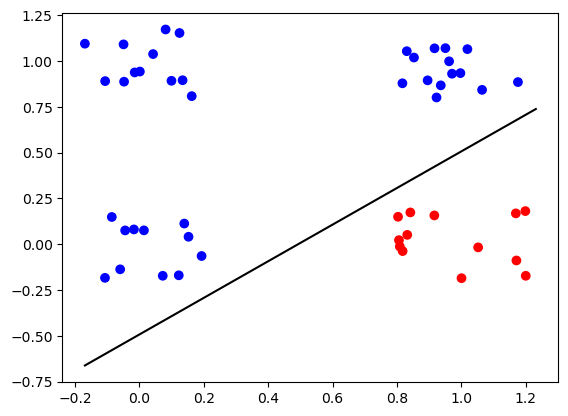

In [85]:
from matplotlib import colors

def plot_decision_boundary(X, Y, W, b):
    fig, ax = plt.subplots()
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']))
    
    x_line = np.arange(np.min(X[0,:]),np.max(X[0,:])*1.1, 0.1)
    ax.plot(x_line, - W[0,0] / W[0,1] * x_line + -b[0,0] / W[0,1] , color="black")
    plt.plot()
    plt.show()
    
plot_decision_boundary(X, Y, W, b)

### Make predictions

Params: [[ 1.   1.   0.   0.   0.5 -0.   0.2  0.1]
 [ 0.   1.   0.   1.  -1.   0.3 -1.5  0.1]]
Predicted target values: [[ True False False False  True False  True False]]


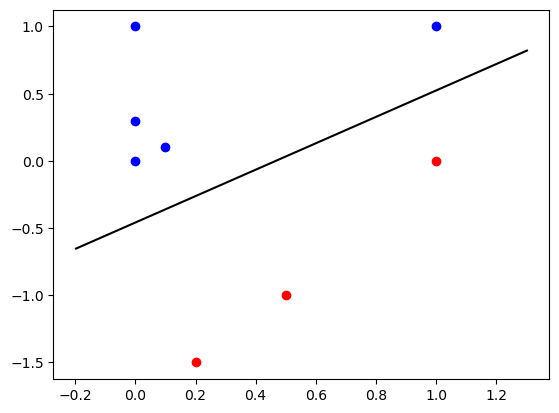

In [28]:
def predict(X, W, b):
    A = forward_propagation(X, W, b)
    predictions = A > 0.5
    
    return predictions

X_pred = np.array([[1, 1, 0, 0, 0.5, -0.0, 0.2, 0.1],
                   [0, 1, 0, 1, -1, 0.3, -1.5, 0.1]])
Y_pred = predict(X_pred, W, b)

print(f"Params: {X_pred}")
print(f"Predicted target values: {Y_pred}")

fig, ax = plt.subplots()

x_line = np.arange(np.min(X[-1,:]),np.max(X[-1,:])*1.1, 0.1)
ax.plot(x_line, - W[0,0] / W[0,1] * x_line + -b[0,0] / W[0,1] , color="black")

for idx,x in enumerate(X_pred[0]):
    if Y_pred[0][idx] == 1:
        color = 'r'
    else:
        color = 'b'
    ax.scatter(x, X_pred[1][idx], color=color)

plt.plot()
plt.show()